In [ ]:
# Provided by Somayeh Komeylian: PhD Student at UCSD & SDSU #
# Deep Learning #
# Name of dataset: seeds_dataset.txt
# Type of dataset: multi-class classification: 3-class classification 
# Method: (Not built from scratch) 
    # 1. MLPClassifier
    # 2. Sequential model in Keras, which is a linear stack of three fully connected (Dense) layers suitable for a feedforward neural network 

In [322]:
################## Step 1: Import all the required Libraries ##################

import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense

In [323]:
################ Step 2: Reading (or Loading) the dataset: #################

f = open(r'C:\Users\komey\OneDrive\Desktop\Summer_classes\Deep Learning\DLSession 3\seeds_dataset.txt')
# f = open(...) opens the file in read mode

data = f.readlines()
# data = f.readlines() reads all lines in the file and stores them as a list of strings

data
# data holds the list of lines from the file, which you can print or process further

['15.26\t14.84\t0.871\t5.763\t3.312\t2.221\t5.22\t1\n',
 '14.88\t14.57\t0.8811\t5.554\t3.333\t1.018\t4.956\t1\n',
 '14.29\t14.09\t0.905\t5.291\t3.337\t2.699\t4.825\t1\n',
 '13.84\t13.94\t0.8955\t5.324\t3.379\t2.259\t4.805\t1\n',
 '16.14\t14.99\t0.9034\t5.658\t3.562\t1.355\t5.175\t1\n',
 '14.38\t14.21\t0.8951\t5.386\t3.312\t2.462\t4.956\t1\n',
 '14.69\t14.49\t0.8799\t5.563\t3.259\t3.586\t5.219\t1\n',
 '14.11\t14.1\t0.8911\t5.42\t3.302\t2.7\t\t5\t\t1\n',
 '16.63\t15.46\t0.8747\t6.053\t3.465\t2.04\t5.877\t1\n',
 '16.44\t15.25\t0.888\t5.884\t3.505\t1.969\t5.533\t1\n',
 '15.26\t14.85\t0.8696\t5.714\t3.242\t4.543\t5.314\t1\n',
 '14.03\t14.16\t0.8796\t5.438\t3.201\t1.717\t5.001\t1\n',
 '13.89\t14.02\t0.888\t5.439\t3.199\t3.986\t4.738\t1\n',
 '13.78\t14.06\t0.8759\t5.479\t3.156\t3.136\t4.872\t1\n',
 '13.74\t14.05\t0.8744\t5.482\t3.114\t2.932\t4.825\t1\n',
 '14.59\t14.28\t0.8993\t5.351\t3.333\t4.185\t4.781\t1\n',
 '13.99\t13.83\t0.9183\t5.119\t3.383\t5.234\t4.781\t1\n',
 '15.69\t14.75\t0.9058\t

In [324]:
################# Step 3: Inspect Data Type: #################

# Convert all columns to numeric (coerce errors to NaN for missing values)
df = df.apply(pd.to_numeric, errors='coerce')

# Basic info
print("INFO:")
print(df.info())

print("\nDESCRIBE:")
print(df.describe())

INFO:
<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   210 non-null    float64
 1   Perimeter              210 non-null    float64
 2   Compactness            210 non-null    float64
 3   Length of Kernel       210 non-null    float64
 4   Width of Kernel        210 non-null    float64
 5   Asymmetry Coefficient  210 non-null    float64
 6   Length of Kernel Gro   210 non-null    float64
 7   Target                 210 non-null    int64  
 8   prediction             210 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 24.5 KB
None

DESCRIBE:
             Area   Perimeter  Compactness  Length of Kernel  Width of Kernel  \
count  210.000000  210.000000   210.000000        210.000000       210.000000   
mean    14.847524   14.559286     0.870999          5.628533         3.258605   
std      2.90

In [325]:
################# Step 3: Inspect Data Type: #################

# Display the first 5 rows
print(df.head())

    Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry Coefficient  Length of Kernel Gro  Target  prediction  
0                  2.221                 5.220       0           0  
1                  1.018                 4.956       0           0  
2                  2.699                 4.825       0           0  
3                  2.259                 4.805       0           0  
4                  1.355                 5.175       0           0  


In [326]:
################# Step 4: Data Cleaning and Preprocessing: #################

for i in data:
    i = i.strip()
    print(i)

# .strip() removes: 
# (1) Leading/trailing spaces
# (2) Newline characters \n at the end of each line
# (3) Tabs or other whitespace

15.26	14.84	0.871	5.763	3.312	2.221	5.22	1
14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1
14.29	14.09	0.905	5.291	3.337	2.699	4.825	1
13.84	13.94	0.8955	5.324	3.379	2.259	4.805	1
16.14	14.99	0.9034	5.658	3.562	1.355	5.175	1
14.38	14.21	0.8951	5.386	3.312	2.462	4.956	1
14.69	14.49	0.8799	5.563	3.259	3.586	5.219	1
14.11	14.1	0.8911	5.42	3.302	2.7		5		1
16.63	15.46	0.8747	6.053	3.465	2.04	5.877	1
16.44	15.25	0.888	5.884	3.505	1.969	5.533	1
15.26	14.85	0.8696	5.714	3.242	4.543	5.314	1
14.03	14.16	0.8796	5.438	3.201	1.717	5.001	1
13.89	14.02	0.888	5.439	3.199	3.986	4.738	1
13.78	14.06	0.8759	5.479	3.156	3.136	4.872	1
13.74	14.05	0.8744	5.482	3.114	2.932	4.825	1
14.59	14.28	0.8993	5.351	3.333	4.185	4.781	1
13.99	13.83	0.9183	5.119	3.383	5.234	4.781	1
15.69	14.75	0.9058	5.527	3.514	1.599	5.046	1
14.7	14.21	0.9153	5.205	3.466	1.767	4.649	1
12.72	13.57	0.8686	5.226	3.049	4.102	4.914	1
14.16	14.4	0.8584	5.658	3.129	3.072	5.176	1
14.11	14.26	0.8722	5.52	3.168	2.688	5.219	1
15.88	14.9	0.8988	5.618	3

In [327]:
################# Step 4: Data Cleaning and Preprocessing: #################

# Iterate through each line in the data
for i in data:
    i = i.strip()
    # Remove leading and trailing whitespace (including newlines)

    x = i.split('\t')
    # Split the line by tab character ('\t')

    lst = [d for d in x if d != '']
    # Remove any empty strings from the split result
    # Equivalent long-form code
    # lst = []
    # for d in x:
    #     if d != '':
    #         lst.append(d)
    
    print(lst)
    # Print the cleaned list of values

['15.26', '14.84', '0.871', '5.763', '3.312', '2.221', '5.22', '1']
['14.88', '14.57', '0.8811', '5.554', '3.333', '1.018', '4.956', '1']
['14.29', '14.09', '0.905', '5.291', '3.337', '2.699', '4.825', '1']
['13.84', '13.94', '0.8955', '5.324', '3.379', '2.259', '4.805', '1']
['16.14', '14.99', '0.9034', '5.658', '3.562', '1.355', '5.175', '1']
['14.38', '14.21', '0.8951', '5.386', '3.312', '2.462', '4.956', '1']
['14.69', '14.49', '0.8799', '5.563', '3.259', '3.586', '5.219', '1']
['14.11', '14.1', '0.8911', '5.42', '3.302', '2.7', '5', '1']
['16.63', '15.46', '0.8747', '6.053', '3.465', '2.04', '5.877', '1']
['16.44', '15.25', '0.888', '5.884', '3.505', '1.969', '5.533', '1']
['15.26', '14.85', '0.8696', '5.714', '3.242', '4.543', '5.314', '1']
['14.03', '14.16', '0.8796', '5.438', '3.201', '1.717', '5.001', '1']
['13.89', '14.02', '0.888', '5.439', '3.199', '3.986', '4.738', '1']
['13.78', '14.06', '0.8759', '5.479', '3.156', '3.136', '4.872', '1']
['13.74', '14.05', '0.8744', '5.48

In [328]:
################# Step 4: Data Cleaning and Preprocessing: #################

# Here are templates you can use that follow the same pattern as:
# lst = [d for d in x if d != '']

# ✅ 1. General List Comprehension Template:
# new_list = [item for item in iterable if condition]

# ✅ 2. Template With Transformation:
# new_list = [transform(item) for item in iterable if condition]
# Example: nums_squared = [n*n for n in nums if n > 0]

# ✅ 3. Template Without Condition:
# new_list = [item for item in iterable]

# ✅ 4. Template Filtering Out Empty or Null Values:
# clean_list = [item for item in iterable if item]
# Or more explicit: clean_list = [item for item in iterable if item != ""]


In [329]:
################# Step 4: Data Cleaning and Preprocessing: #################

df = pd.DataFrame(columns=['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymmetry Coefficient', 'Length of Kernel Gro', 'Target'])
# The names in the provided header are optional, but they should match the number of columns in the .txt file.
df

Empty DataFrame
Columns: [Area, Perimeter, Compactness, Length of Kernel, Width of Kernel, Asymmetry Coefficient, Length of Kernel Gro, Target]
Index: []

In [330]:
################# Step 4: Data Cleaning and Preprocessing: #################

# Here are clean templates you can use for creating a Pandas DataFrame with predefined columns—similar to:
# df = pd.DataFrame(columns=['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymmetry Coefficient', 'Length of Kernel Gro', 'Target'])

# ✅ 1. Template: Empty DataFrame with Columns:
"""import pandas as pd
df = pd.DataFrame(columns=[
    'Column1',
    'Column2',
    'Column3',
    'Column4'
])"""

# ✅ 2. Template With Your Column Names:
"""import pandas as pd
df = pd.DataFrame(columns=[
    'Area',
    'Perimeter',
    'Compactness',
    'Length of Kernel',
    'Width of Kernel',
    'Asymmetry Coefficient',
    'Length of Kernel Gro',
    'Target'
])"""

# ✅ 3. Template: DataFrame With Initial Empty Rows:
"""import pandas as pd
import numpy as np
df = pd.DataFrame(
    np.nan,
    index=range(5),      # number of rows you want
    columns=[
        'Area',
        'Perimeter',
        'Compactness',
        'Length of Kernel',
        'Width of Kernel',
        'Asymmetry Coefficient',
        'Length of Kernel Gro',
        'Target'
    ]
)"""

# ✅ 4. Template: Add Rows Later:
"""df.loc[len(df)] = {
    'Area': value1,
    'Perimeter': value2,
    'Compactness': value3,
    'Length of Kernel': value4,
    'Width of Kernel': value5,
    'Asymmetry Coefficient': value6,
    'Length of Kernel Gro': value7,
    'Target': value8
}"""

# ✅ 5. Template: Create From a List of Dicts:
"""data = [
    {'Area': 10, 'Perimeter': 4, 'Compactness': 1.2, ...},
    {'Area': 12, 'Perimeter': 5, 'Compactness': 1.1, ...},
]

df = pd.DataFrame(data)"""


"data = [\n    {'Area': 10, 'Perimeter': 4, 'Compactness': 1.2, ...},\n    {'Area': 12, 'Perimeter': 5, 'Compactness': 1.1, ...},\n]\n\ndf = pd.DataFrame(data)"

In [331]:
################# Step 4: Data Cleaning and Preprocessing: #################

# Iterate through each line of data and assign values to the DataFrame
for j, i in enumerate(data):
    i = i.strip()  # Remove leading and trailing whitespace
    x = i.split('\t')  # Split the line by tab
    lst = [d for d in x if d != '']  # Remove empty strings from the list (if any)
    
    # Ensure the number of elements in lst matches the number of columns
    df.loc[j, :] = lst  # Assign the cleaned list to the DataFrame row `j`

# Display the DataFrame
df

Area Perimeter Compactness Length of Kernel Width of Kernel  \
0    15.26     14.84       0.871            5.763           3.312   
1    14.88     14.57      0.8811            5.554           3.333   
2    14.29     14.09       0.905            5.291           3.337   
3    13.84     13.94      0.8955            5.324           3.379   
4    16.14     14.99      0.9034            5.658           3.562   
..     ...       ...         ...              ...             ...   
205  12.19      13.2      0.8783            5.137           2.981   
206  11.23     12.88      0.8511             5.14           2.795   
207   13.2     13.66      0.8883            5.236           3.232   
208  11.84     13.21      0.8521            5.175           2.836   
209   12.3     13.34      0.8684            5.243           2.974   

    Asymmetry Coefficient Length of Kernel Gro Target  
0                   2.221                 5.22      1  
1                   1.018                4.956      1  
2                   2.699                4.825      1  
3                   2.259                4.805      1  
4                   1.355                5.175      1  
..                    ...                  ...    ...  
205                 3.631                 4.87      3  
206                 4.325                5.003      3  
207                 8.315                5.056      3  
208                 3.598                5.044      3  
209                 5.637                5.063      3  

[210 rows x 8 columns]

In [ ]:
################# Step 4: Data Cleaning and Preprocessing: #################

# Regression vs. Classification:
#### 1. Type of Problem (Regression vs. Classification)
# Regression: This is used when the target variable (Target column) is a continuous variable, meaning it takes numerical values that can vary within a range (e.g., predicting house prices, temperature, etc.).
# Classification: This is used when the target variable is a categorical variable, where the values represent distinct classes or labels (e.g., types of animals, disease categories, etc.).

#### 2. Dataset Structure
# The dataset has 210 entries and 8 columns, including the Target column.
# All columns, including Area, Perimeter, Compactness, etc., are of type object, which suggests that they are stored as strings, possibly due to non-numeric characters such as commas or special symbols.

#### 3. Key Indicator - Target Column
# To determine whether it's a classification or regression task, the key lies in understanding the Target column:
# If the Target column contains numerical values (e.g., prices, temperatures, etc.), the task is regression.
# If the Target column contains categorical values (e.g., species of flowers, types of seeds), the task is classification.

#### 4. Next Steps to Determine the Type of Problem
# You can inspect the Target column to better understand its data type and values. You can check its unique values using this code:
# Check the unique values in the 'Target' column
print(df['Target'].unique()) # To confirm that the given dataset (Seeds_dataset_txt Dataset) is of classification type

##### Possible Scenarios:
## a. Target is Numeric (Continuous Values)
## If the Target column contains continuous values (e.g., 12.5, 300.3, etc.), the dataset is for regression.

## b. Target is Categorical (Discrete Classes)
## If the Target column contains discrete classes or labels (e.g., 'Class 1', 'Class 2', or specific types like 'Seed Type A', 'Seed Type B'), the dataset is for classification.

## For example:
## Classification: If the Target column contains labels such as ['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'], it's a classification problem.
## Regression: If the Target column contains numerical values like [200, 150, 300, 120] (e.g., prices), it would be a regression task.

#### 5. Check Data Types and Clean the Data
# You should also convert the feature columns (e.g., Area, Perimeter, Compactness) from object to numerical data types. Here's how to clean the data and make the dataset ready for machine learning:

# If the 'Target' column is categorical, you can encode it (if necessary)
# label_encoder = LabelEncoder()
# df['Target'] = label_encoder.fit_transform(df['Target'])

# Conclusion:
## If the Target column contains categorical labels, it is a classification problem.
## If the Target column contains continuous numeric values, it is a regression problem.

['1' '2' '3']


In [333]:
################# Step 3: Inspect Data Types: #################

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Area                   210 non-null    object
 1   Perimeter              210 non-null    object
 2   Compactness            210 non-null    object
 3   Length of Kernel       210 non-null    object
 4   Width of Kernel        210 non-null    object
 5   Asymmetry Coefficient  210 non-null    object
 6   Length of Kernel Gro   210 non-null    object
 7   Target                 210 non-null    object
dtypes: object(8)
memory usage: 22.9+ KB


In [334]:
################# Step 4: Data Cleaning and Preprocessing: #################

"""# Convert the feature columns to numeric (assuming the columns contain numbers as strings)
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df['Perimeter'] = pd.to_numeric(df['Perimeter'], errors='coerce')
df['Compactness'] = pd.to_numeric(df['Compactness'], errors='coerce')
df['Length of Kernel'] = pd.to_numeric(df['Length of Kernel'], errors='coerce')
df['Width of Kernel'] = pd.to_numeric(df['Width of Kernel'], errors='coerce')
df['Asymmetry Coefficient'] = pd.to_numeric(df['Asymmetry Coefficient'], errors='coerce')
df['Length of Kernel Gro'] = pd.to_numeric(df['Length of Kernel Gro'], errors='coerce')
"""

# Rather than using the code snippets above, you can implement the following loop to convert the feature columns to a numeric data type.
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

In [335]:
################# Step 3: Inspect Data Types: #################

df

Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0    15.26      14.84       0.8710             5.763            3.312   
1    14.88      14.57       0.8811             5.554            3.333   
2    14.29      14.09       0.9050             5.291            3.337   
3    13.84      13.94       0.8955             5.324            3.379   
4    16.14      14.99       0.9034             5.658            3.562   
..     ...        ...          ...               ...              ...   
205  12.19      13.20       0.8783             5.137            2.981   
206  11.23      12.88       0.8511             5.140            2.795   
207  13.20      13.66       0.8883             5.236            3.232   
208  11.84      13.21       0.8521             5.175            2.836   
209  12.30      13.34       0.8684             5.243            2.974   

     Asymmetry Coefficient  Length of Kernel Gro  Target  
0                    2.221                 5.220       1  
1                    1.018                 4.956       1  
2                    2.699                 4.825       1  
3                    2.259                 4.805       1  
4                    1.355                 5.175       1  
..                     ...                   ...     ...  
205                  3.631                 4.870       3  
206                  4.325                 5.003       3  
207                  8.315                 5.056       3  
208                  3.598                 5.044       3  
209                  5.637                 5.063       3  

[210 rows x 8 columns]

In [337]:
################# Step 4: Data Cleaning and Preprocessing: #################

print(df.isna().sum())

Area                     0
Perimeter                0
Compactness              0
Length of Kernel         0
Width of Kernel          0
Asymmetry Coefficient    0
Length of Kernel Gro     0
Target                   0
dtype: int64


In [338]:
################# Step 4: Data Cleaning and Preprocessing: #################

from sklearn.preprocessing import LabelEncoder

# Step 2: Encode the target column (if it's categorical) using LabelEncoder
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])  # Assuming 'Target' is categorical


In [339]:
################# Step 4: Data Cleaning and Preprocessing: #################

x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [340]:
################# Step 4: Data Cleaning and Preprocessing: #################

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Scale X
scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(x)

In [346]:
################# Step 4: Split the data into training and testing sets: #################

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)
print(f"x_train.shape is {x_train.shape} \ny_train.shape is {y_train.shape} \nx_test.shape is {x_test.shape} \ny_test.shape is {y_test.shape}")

x_train.shape is (168, 7) 
y_train.shape is (168,) 
x_test.shape is (42, 7) 
y_test.shape is (42,)


In [347]:
################# Step 5: Fit the model: #################

from sklearn.neural_network import MLPClassifier
RegModel = MLPClassifier(max_iter = 300)
RegModel.fit(x_train, y_train)

C:\Users\komey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300)

In [348]:
################# Step 6: Evaluate the model performance for MLPClassifier: #################

RegModel.score(x_test, y_test)

0.8809523809523809

In [351]:
################# Step 6: Evaluate the model performance for MLPClassifier: #################

y_pred = RegModel.predict(x_scaled)        # 1D result

df["prediction"] = y_pred
print(df.head())

    Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry Coefficient  Length of Kernel Gro  Target  prediction  
0                  2.221                 5.220       0           0  
1                  1.018                 4.956       0           0  
2                  2.699                 4.825       0           0  
3                  2.259                 4.805       0           0  
4                  1.355                 5.175       0           0  


In [352]:
################# Step 4: Split the data into training and testing sets: #################

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)
print(f"x_train.shape is {x_train.shape} \ny_train.shape is {y_train.shape} \nx_test.shape is {x_test.shape} \ny_test.shape is {y_test.shape}")

x_train.shape is (168, 7) 
y_train.shape is (168,) 
x_test.shape is (42, 7) 
y_test.shape is (42,)


In [353]:
################# Step 7: Define the Dense Model Architecture: #################
# Option 1:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
Model = Sequential()

# Add layers to the model
Model.add(Dense(64, activation='relu', input_shape=(7,)))  # Corrected the input_shape argument
Model.add(Dense(32, activation='relu'))
Model.add(Dense(16, activation='relu'))
Model.add(Dense(3, activation='linear'))  # Output layer with 3 neurons (for regression)

# Summary of the model
Model.summary()

C:\Users\komey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,171 (12.39 KB)

 Trainable params: 3,171 (12.39 KB)

 Non-trainable params: 0 (0.00 B)

In [354]:
################# Step 7: Define the Dense Model Architecture: #################
# Option 2:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
Model = Sequential()

# Add layers to the model
Model.add(Dense(64, activation='relu', input_shape=(7,)))  # Example with 7 input features
Model.add(Dense(32, activation='relu'))
Model.add(Dense(16, activation='relu'))

# Output layer with 'softmax' activation for multi-class classification
num_classes = 3  # Number of classes in your problem (adjust as necessary)
Model.add(Dense(num_classes, activation='softmax'))  # Correct number of output units with softmax

# Model summary
Model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,171 (12.39 KB)

 Trainable params: 3,171 (12.39 KB)

 Non-trainable params: 0 (0.00 B)

In [355]:
################# Step 8: Compile and Fit the model: #################

# Compile the model
Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = Model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=20)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3731 - loss: 1.0912 - val_accuracy: 0.2647 - val_loss: 1.0834
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3731 - loss: 1.0708 - val_accuracy: 0.2647 - val_loss: 1.0669
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3806 - loss: 1.0492 - val_accuracy: 0.4118 - val_loss: 1.0472
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4776 - loss: 1.0238 - val_accuracy: 0.4412 - val_loss: 1.0230
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5597 - loss: 0.9952 - val_accuracy: 0.5000 - val_loss: 0.9935
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5896 - loss: 0.9587 - val_accuracy: 0.5294 - val_loss: 0.9542
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5970 - loss: 0.9165 - val_accuracy: 0.5294 - val_loss: 0.9103
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6269 - loss: 0.8691 - val_accuracy: 0.5882 - val_loss: 0.8608


In [356]:
################# Step 9: Evaluate the dense model performance: #################

test_loss, test_accuracy = Model.evaluate(x_test, y_test)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8810 - loss: 0.2176
Test Loss: 0.21758568286895752
Test Accuracy: 0.8809523582458496


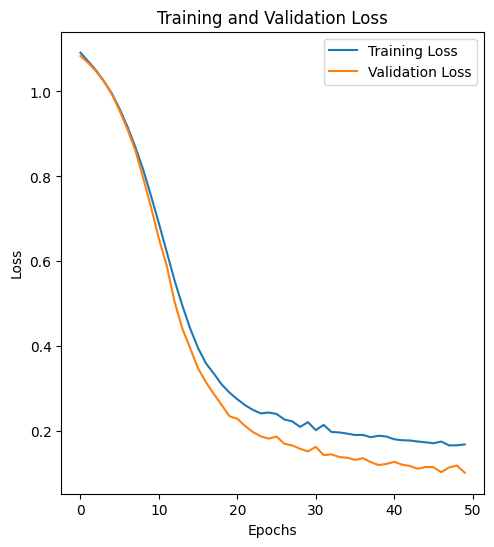

In [357]:
################# Step 9: Evaluate the dense model performance: #################

# Visualization of Loss and Accuracy
# 1. Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

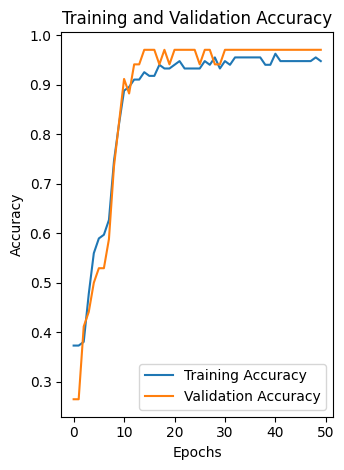

In [358]:
################# Step 9: Evaluate the dense model performance: #################

# Visualization of Loss and Accuracy
# 2. Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


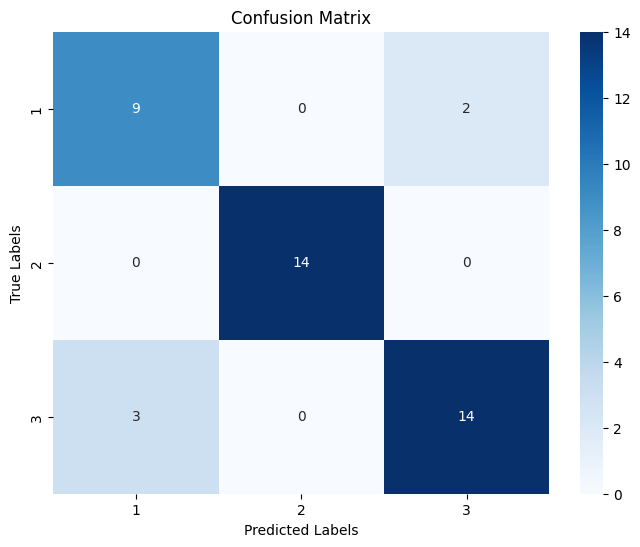

In [359]:
################# Step 9: Evaluate the dense model performance: #################

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Confusion Matrix ---
# Predict the labels for the test set
y_pred = Model.predict(x_test)  # Predict probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels (indices)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)  # Compare predicted labels with true labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [360]:
################# Step 9: Evaluate the dense model performance: #################

y_pred = Model.predict(x_scaled)        
y_pred_class = y_pred.argmax(axis=1)    

df["prediction"] = y_pred_class     
print(df.head())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
    Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry Coefficient  Length of Kernel Gro  Target  prediction  
0                  2.221                 5.220       0           0  
1                  1.018                 4.956       0           0  
2                  2.699                 4.825       0           0  
3                  2.259                 4.805       0           0  
4                  1.355                 5.175       0           0  
